https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [1]:
import os
import json
import pickle
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [4]:
from IPython.display import display, HTML
import warnings

In [5]:
import xgboost as xgb

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [7]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [8]:
import mlflow

In [9]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

In [10]:
cd ..

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training


In [11]:
CONFIG = 'config.json'

In [12]:
TRAIN = 'green_tripdata_2021-01.parquet'

In [13]:
TEST = 'green_tripdata_2021-02.parquet'

In [14]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TRAIN = os.path.join(os.getcwd(), 'INPUTS', TRAIN)

# Print the file path
print(FILE_PATH_TRAIN)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\green_tripdata_2021-01.parquet


In [15]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TEST = os.path.join(os.getcwd(), 'INPUTS', TEST)

# Print the file path
print(FILE_PATH_TEST)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\green_tripdata_2021-02.parquet


In [16]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\CONFIGS\config.json


In [17]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [18]:
df = pd.read_parquet(FILE_PATH_TRAIN)

In [19]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.00,43,151,1.00,1.01,5.50,0.50,0.50,0.00,0.00,None,0.30,6.80,2.00,1.00,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.00,166,239,1.00,2.53,10.00,0.50,0.50,2.81,0.00,None,0.30,16.86,1.00,1.00,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.00,41,42,1.00,1.12,6.00,0.50,0.50,1.00,0.00,None,0.30,8.30,1.00,1.00,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.00,168,75,1.00,1.99,8.00,0.50,0.50,0.00,0.00,None,0.30,9.30,2.00,1.00,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.00,265,265,3.00,0.00,-52.00,0.00,-0.50,0.00,0.00,None,-0.30,-52.80,3.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.00,0.00,6.12,None,0.30,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.00,12.20,6.12,None,0.30,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.00,0.00,0.00,None,0.30,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.00,0.00,6.12,None,0.30,58.04,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               76518 non-null  int64         
 1   lpep_pickup_datetime   76518 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  76518 non-null  datetime64[ns]
 3   store_and_fwd_flag     40471 non-null  object        
 4   RatecodeID             40471 non-null  float64       
 5   PULocationID           76518 non-null  int64         
 6   DOLocationID           76518 non-null  int64         
 7   passenger_count        40471 non-null  float64       
 8   trip_distance          76518 non-null  float64       
 9   fare_amount            76518 non-null  float64       
 10  extra                  76518 non-null  float64       
 11  mta_tax                76518 non-null  float64       
 12  tip_amount             76518 non-null  float64       
 13  t

In [21]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [22]:
df.loc[((df.duration >= 1) & (df.duration <= 60)), 'duration'].mean()

16.852578430841948

In [23]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.00,43,151,1.00,1.01,5.50,...,0.50,0.00,0.00,None,0.30,6.80,2.00,1.00,0.00,3.93
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.00,166,239,1.00,2.53,10.00,...,0.50,2.81,0.00,None,0.30,16.86,1.00,1.00,2.75,8.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.00,41,42,1.00,1.12,6.00,...,0.50,1.00,0.00,None,0.30,8.30,1.00,1.00,0.00,5.97
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.00,168,75,1.00,1.99,8.00,...,0.50,0.00,0.00,None,0.30,9.30,2.00,1.00,0.00,7.08
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.00,75,75,6.00,0.45,3.50,...,0.50,0.96,0.00,None,0.30,5.76,1.00,1.00,0.00,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.00,0.00,6.12,None,0.30,65.40,NaN,NaN,NaN,38.00
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.00,12.20,6.12,None,0.30,65.28,NaN,NaN,NaN,38.00
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.00,0.00,0.00,None,0.30,22.00,NaN,NaN,NaN,11.00
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.00,0.00,6.12,None,0.30,58.04,NaN,NaN,NaN,27.00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73908 entries, 0 to 76517
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               73908 non-null  int64         
 1   lpep_pickup_datetime   73908 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  73908 non-null  datetime64[ns]
 3   store_and_fwd_flag     38175 non-null  object        
 4   RatecodeID             38175 non-null  float64       
 5   PULocationID           73908 non-null  object        
 6   DOLocationID           73908 non-null  object        
 7   passenger_count        38175 non-null  float64       
 8   trip_distance          73908 non-null  float64       
 9   fare_amount            73908 non-null  float64       
 10  extra                  73908 non-null  float64       
 11  mta_tax                73908 non-null  float64       
 12  tip_amount             73908 non-null  float64       
 13  tolls_

In [25]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [26]:
target = 'duration'
y_train = df[target].values

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_train)

In [29]:
mean_squared_error(y_train, y_pred, squared=False)

9.827368941909368

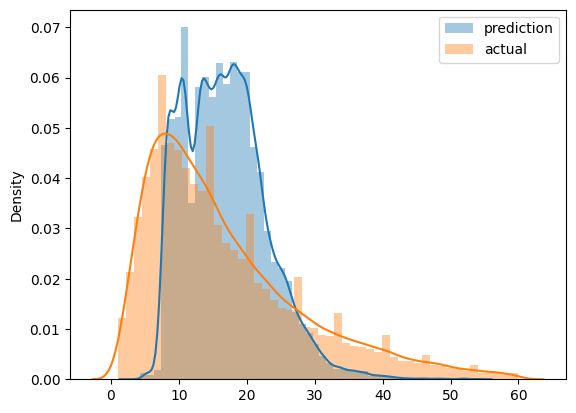

In [30]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [31]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [32]:
df_train = read_dataframe(FILE_PATH_TRAIN)
df_val = read_dataframe(FILE_PATH_TEST)

In [33]:
len(df_train), len(df_val)

(73908, 61921)

##### preprocessing

In [34]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [35]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

In [36]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [37]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [38]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

##### training LR

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_val)

In [ ]:
mean_squared_error(y_val, y_pred, squared=False)

In [ ]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [ ]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_val)

In [ ]:
mean_squared_error(y_val, y_pred, squared=False)

## Module 2.

In [39]:
X_train[:10]

<10x13221 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [40]:
X_train

<73908x13221 sparse matrix of type '<class 'numpy.float64'>'
	with 147816 stored elements in Compressed Sparse Row format>

In [41]:
y_train.shape

(73908,)

In [42]:
X_val.shape

(61921, 13221)

In [43]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('duration-prediction')

<Experiment: artifact_location='file:///C:/Users/KonuTech/PycharmProjects/mlops-zoomcamp-training/mlruns/2', creation_time=1684388799134, experiment_id='2', last_update_time=1684388799134, lifecycle_stage='active', name='duration-prediction', tags={}>

##### training 50 models

In [ ]:
with mlflow.start_run():

    mlflow.set_tag('developer', 'Konrad')
    mlflow.log_param('train-data-path', 'yellow_tripdata_2022-01.parquet')
    mlflow.log_param('valid-data-path', 'yellow_tripdata_2022-02.parquet')
    
    alpha = 0.1
    mlflow.log_param('alpha', alpha)
    
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric('rmse', rmse)
    

In [ ]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [ ]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [ ]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0), # exp(-3), exp(0) -> [0.05, 1]
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

In [ ]:
best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

##### Training champion

In [56]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('duration-prediction')

<Experiment: artifact_location='file:///C:/Users/KonuTech/PycharmProjects/mlops-zoomcamp-training/mlruns/2', creation_time=1684388799134, experiment_id='2', last_update_time=1684388799134, lifecycle_stage='active', name='duration-prediction', tags={}>

In [57]:
# mlflow.xgboost.autolog(disable=True)

In [58]:
with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)
    
    best_params = {
        'learning_rate': 0.2588331850062768,
        'max_depth': 11,
        'min_child_weight': 0.3856922787279994,
        'objective': 'reg:linear',
        'reg_alpha': 0.029460359108689937,
        'reg_lambda': 0.02362910461385351,
        'seed': 42
    }

#     mlflow.xgboost.autolog()
    
    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )
    
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric('rmse', rmse)
    
    with open('models/preprocessor.b', 'wb') as f_out:
        pickle.dump(dv, f_out)

    mlflow.log_artifact('models/preprocessor.b', artifact_path='preprocessor')
    
    mlflow.xgboost.log_model(booster, artifact_path='models_mlflow')
    


[13:43:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:16.64506
[1]	validation-rmse:13.41532
[2]	validation-rmse:11.16448
[3]	validation-rmse:9.63062
[4]	validation-rmse:8.61319
[5]	validation-rmse:7.94742
[6]	validation-rmse:7.51340
[7]	validation-rmse:7.23336
[8]	validation-rmse:7.04615
[9]	validation-rmse:6.92450
[10]	validation-rmse:6.84156
[11]	validation-rmse:6.78195
[12]	validation-rmse:6.74291
[13]	validation-rmse:6.71453
[14]	validation-rmse:6.69455
[15]	validation-rmse:6.67805
[16]	validation-rmse:6.66766
[17]	validation-rmse:6.66042
[18]	validation-rmse:6.65409
[19]	validation-rmse:6.64727
[20]	validation-rmse:6.64215
[21]	validation-rmse:6.63840
[22]	validation-rmse:6.63612
[23]	validation-rmse:6.63311
[24]	validation-rmse:6.62884
[25]	validation-rmse:6.62690
[26]	validation-rmse:6

[268]	validation-rmse:6.46462
[269]	validation-rmse:6.46466
[270]	validation-rmse:6.46454
[271]	validation-rmse:6.46417
[272]	validation-rmse:6.46389
[273]	validation-rmse:6.46507
[274]	validation-rmse:6.46526
[275]	validation-rmse:6.46553
[276]	validation-rmse:6.46512
[277]	validation-rmse:6.46500
[278]	validation-rmse:6.46496
[279]	validation-rmse:6.46478
[280]	validation-rmse:6.46431
[281]	validation-rmse:6.46437
[282]	validation-rmse:6.46391
[283]	validation-rmse:6.46365
[284]	validation-rmse:6.46364
[285]	validation-rmse:6.46352
[286]	validation-rmse:6.46333
[287]	validation-rmse:6.46274
[288]	validation-rmse:6.46257
[289]	validation-rmse:6.46242
[290]	validation-rmse:6.46220
[291]	validation-rmse:6.46168
[292]	validation-rmse:6.46163
[293]	validation-rmse:6.46116
[294]	validation-rmse:6.46069
[295]	validation-rmse:6.46040
[296]	validation-rmse:6.46027
[297]	validation-rmse:6.45934
[298]	validation-rmse:6.45913
[299]	validation-rmse:6.45869
[300]	validation-rmse:6.45878
[301]	vali

[541]	validation-rmse:6.41214
[542]	validation-rmse:6.41201
[543]	validation-rmse:6.41148
[544]	validation-rmse:6.41143
[545]	validation-rmse:6.41132
[546]	validation-rmse:6.41156
[547]	validation-rmse:6.41142
[548]	validation-rmse:6.41129
[549]	validation-rmse:6.41143
[550]	validation-rmse:6.41112
[551]	validation-rmse:6.41093
[552]	validation-rmse:6.41082
[553]	validation-rmse:6.41054
[554]	validation-rmse:6.41064
[555]	validation-rmse:6.41090
[556]	validation-rmse:6.41085
[557]	validation-rmse:6.41078
[558]	validation-rmse:6.41059
[559]	validation-rmse:6.41037
[560]	validation-rmse:6.41037
[561]	validation-rmse:6.41002
[562]	validation-rmse:6.40967
[563]	validation-rmse:6.40939
[564]	validation-rmse:6.40891
[565]	validation-rmse:6.40895
[566]	validation-rmse:6.40863
[567]	validation-rmse:6.40844
[568]	validation-rmse:6.40841
[569]	validation-rmse:6.40789
[570]	validation-rmse:6.40793
[571]	validation-rmse:6.40784
[572]	validation-rmse:6.40778
[573]	validation-rmse:6.40774
[574]	vali

[815]	validation-rmse:6.38638
[816]	validation-rmse:6.38622
[817]	validation-rmse:6.38628
[818]	validation-rmse:6.38599
[819]	validation-rmse:6.38606
[820]	validation-rmse:6.38641
[821]	validation-rmse:6.38654
[822]	validation-rmse:6.38586
[823]	validation-rmse:6.38579
[824]	validation-rmse:6.38575
[825]	validation-rmse:6.38569
[826]	validation-rmse:6.38567
[827]	validation-rmse:6.38538
[828]	validation-rmse:6.38542
[829]	validation-rmse:6.38521
[830]	validation-rmse:6.38520
[831]	validation-rmse:6.38509
[832]	validation-rmse:6.38486
[833]	validation-rmse:6.38473
[834]	validation-rmse:6.38490
[835]	validation-rmse:6.38504
[836]	validation-rmse:6.38531
[837]	validation-rmse:6.38522
[838]	validation-rmse:6.38517
[839]	validation-rmse:6.38578
[840]	validation-rmse:6.38580
[841]	validation-rmse:6.38558
[842]	validation-rmse:6.38540
[843]	validation-rmse:6.38535
[844]	validation-rmse:6.38523
[845]	validation-rmse:6.38522
[846]	validation-rmse:6.38559
[847]	validation-rmse:6.38531
[848]	vali

In [60]:
# import mlflow
logged_model = 'runs:/7aa27c3f85b9474d811bba5b9c7d4002/models_mlflow'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
# import pandas as pd
# loaded_model.predict(pd.DataFrame(data))

2023/05/18 14:05:40 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.3.2, required: mlflow==2.3)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


[14:05:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_mlflow
  flavor: mlflow.xgboost
  run_id: 7aa27c3f85b9474d811bba5b9c7d4002

In [62]:
xgboost_model = mlflow.xgboost.load_model('runs:/7aa27c3f85b9474d811bba5b9c7d4002/models_mlflow')

[14:05:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [49]:
y_pred = xgboost_model.predict(valid)

In [50]:
y_pred[:10]

array([15.983021 ,  7.162818 , 13.602187 , 23.934893 ,  9.398078 ,
       17.04794  , 12.0759115,  8.515362 ,  8.847407 , 17.621191 ],
      dtype=float32)

In [51]:
# Retrieve feature importance information
importance_scores = xgboost_model.get_score(importance_type='weight')

# Sort the scores in descending order
sorted_indices = np.argsort(list(importance_scores.values()))[::-1]
sorted_scores = np.array(list(importance_scores.values()))[sorted_indices]

# Get the corresponding feature names
feature_names = list(importance_scores.keys())

# Print the selected variables and their importance scores
for feature, score in zip(feature_names, sorted_scores):
    print(f"Feature: {feature}, Importance Score: {score}")

Feature: f0, Importance Score: 25225.0
Feature: f1, Importance Score: 25.0
Feature: f2, Importance Score: 23.0
Feature: f3, Importance Score: 17.0
Feature: f5, Importance Score: 15.0
Feature: f6, Importance Score: 13.0
Feature: f9, Importance Score: 13.0
Feature: f13, Importance Score: 13.0
Feature: f14, Importance Score: 12.0
Feature: f16, Importance Score: 10.0
Feature: f18, Importance Score: 10.0
Feature: f20, Importance Score: 10.0
Feature: f22, Importance Score: 10.0
Feature: f24, Importance Score: 9.0
Feature: f29, Importance Score: 9.0
Feature: f35, Importance Score: 9.0
Feature: f37, Importance Score: 9.0
Feature: f38, Importance Score: 9.0
Feature: f39, Importance Score: 9.0
Feature: f50, Importance Score: 8.0
Feature: f52, Importance Score: 8.0
Feature: f54, Importance Score: 8.0
Feature: f60, Importance Score: 8.0
Feature: f67, Importance Score: 8.0
Feature: f75, Importance Score: 8.0
Feature: f76, Importance Score: 8.0
Feature: f77, Importance Score: 8.0
Feature: f80, Impor

In [52]:
len(list(importance_scores.keys()))

5112

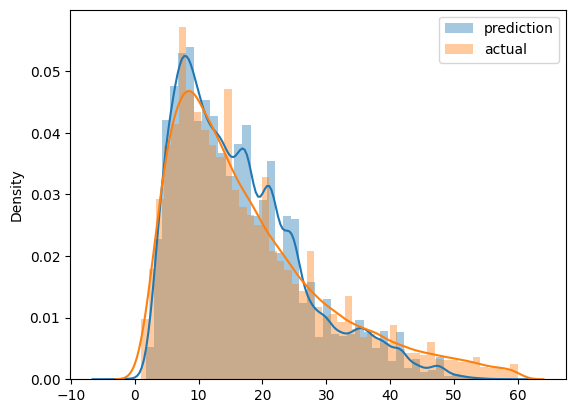

In [53]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [54]:
# mlflow.sklearn.autolog()

# for model_class in (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, LinearSVR):

#     with mlflow.start_run():

#         mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
#         mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")
#         mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

#         mlmodel = model_class()
#         mlmodel.fit(X_train, y_train)

#         y_pred = mlmodel.predict(X_val)
#         rmse = mean_squared_error(y_val, y_pred, squared=False)
#         mlflow.log_metric("rmse", rmse)

In [55]:
mlflow.sklearn.autolog()

for model_class in (RandomForestRegressor, GradientBoostingRegressor, LinearSVR):

    with mlflow.start_run():

        mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
        mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")
        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

        mlmodel = model_class()
        mlmodel.fit(X_train, y_train)

        y_pred = mlmodel.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)